In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web


style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)


df = web.DataReader('TSLA', "yahoo", start, end)




In [7]:
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


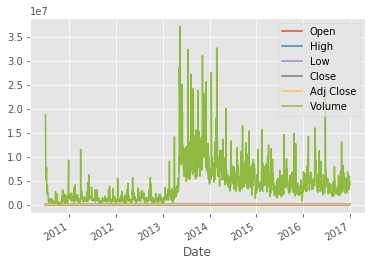

In [8]:
df.plot()
plt.show()

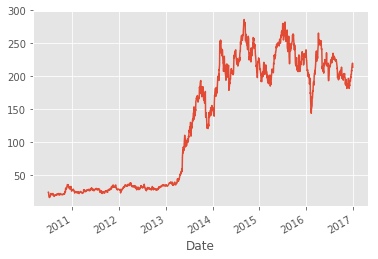

In [9]:
df['Adj Close'].plot()
plt.show()

In [10]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.dropna(inplace=True)
print(df.head())

df.to_csv('TSLA.csv')

                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


In [11]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

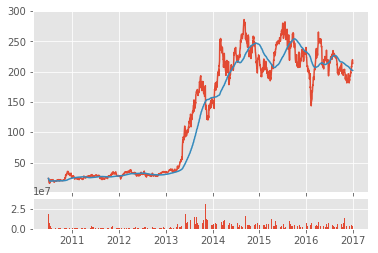

In [12]:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [13]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)


In [14]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())


                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [15]:
df_ohlc = df_ohlc.reset_index()
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000


In [16]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [17]:
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


In [18]:
#fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1,colspan=1, sharex=ax1)
ax1.xaxis_date()

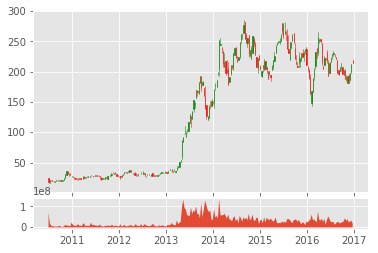

In [19]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [35]:
import bs4 as bs
import pickle
import requests

In [36]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')

    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)

    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers,f)


    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BCR',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',


In [37]:
tickersLoaded = save_sp500_tickers()

In [38]:
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import time
from random import randint as rand

In [39]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open ("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016, 12, 31)
    
    for count,ticker in enumerate (tickers):
        print (ticker, count)
        if not os.path.exists ('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, "yahoo", start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            time.sleep(30+rand(0,60))
        else:
            print('Already have {}'.format(ticker))
        
            
get_data_from_yahoo()
        

MMM 0
Already have MMM
ABT 1
Already have ABT
ABBV 2
Already have ABBV
ACN 3
Already have ACN
ATVI 4
Already have ATVI
AYI 5
Already have AYI
ADBE 6
Already have ADBE
AMD 7
Already have AMD
AAP 8
Already have AAP
AES 9
Already have AES
AET 10
Already have AET
AMG 11
Already have AMG
AFL 12
Already have AFL
A 13
Already have A
APD 14
Already have APD
AKAM 15
Already have AKAM
ALK 16
Already have ALK
ALB 17
Already have ALB
ARE 18
Already have ARE
ALXN 19
Already have ALXN
ALGN 20
Already have ALGN
ALLE 21
Already have ALLE
AGN 22
Already have AGN
ADS 23
Already have ADS
LNT 24
Already have LNT
ALL 25
Already have ALL
GOOGL 26
Already have GOOGL
GOOG 27
Already have GOOG
MO 28
Already have MO
AMZN 29
Already have AMZN
AEE 30
Already have AEE
AAL 31
Already have AAL
AEP 32
Already have AEP
AXP 33
Already have AXP
AIG 34
Already have AIG
AMT 35
Already have AMT
AWK 36
Already have AWK
AMP 37
Already have AMP
ABC 38
Already have ABC
AME 39
Already have AME
AMGN 40
Already have AMGN
APH 41
A

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/BRK.B?period1=946702800&period2=1483246799&interval=1d&events=history&crumb=yU6QVgqmWxb

In [ ]:
df = web.DataReader("ADS", "yahoo", start, end)
print(df.head())

In [ ]:
with open ('sp500Tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
print(tickers)

In [40]:
def compile_data():
    with open ('sp500Tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    notLoaded = []
    
    for count,ticker in enumerate (tickers):
        if os.path.exists ('stock_dfs/{}.csv'.format(ticker)):
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace= True)
            df.drop(['Open', 'High','Low','Close','Volume'],1,inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 10 == 0:
                print (count)
        else:
            notLoaded.append(count)
            #print('have yet to load {}'.format(count))
    
    print("not loaded",min(notLoaded),"through",max(notLoaded))
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
        
compile_data()

0
10
20
30
40
50
60
70
not loaded 72 through 504
                  MMM        ABT  ABBV  ACN      ATVI  AYI       ADBE     AMD  \
Date                                                                            
2000-01-03  30.614885  10.056676   NaN  NaN  1.251975  NaN  16.274672  15.500   
2000-01-04  29.398392   9.769344   NaN  NaN  1.213892  NaN  14.909399  14.625   
2000-01-05  30.249941   9.751384   NaN  NaN  1.218653  NaN  15.204174  15.000   
2000-01-06  32.682892  10.092591   NaN  NaN  1.194851  NaN  15.328290  16.000   
2000-01-07  33.331699  10.200341   NaN  NaN  1.228173  NaN  16.072987  16.250   

            AAP        AES    ...            AVB        AVY       BHGE  \
Date                          ...                                        
2000-01-03  NaN  31.310091    ...      16.074749  43.876801  13.652710   
2000-01-04  NaN  30.068480    ...      15.719504  43.300491  13.652710   
2000-01-05  NaN  30.392372    ...      15.867519  44.722061  13.736985   
2000-01-06  N

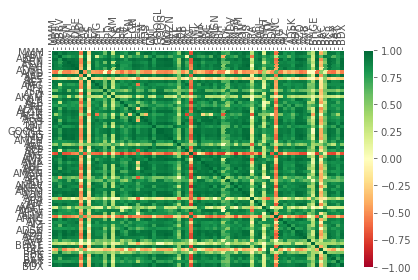

In [41]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    
    heatmap1 = ax1.pcolor(data1, cmap = plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    
                  
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

visualize_data()

In [42]:
%matplotlib notebook


In [43]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv',index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace = True)
    
    for i in range (1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace = True)
    
    return tickers, df

In [44]:
df = pd.read_csv('sp500_joined_closes.csv',index_col=0)
tickers = df.columns.values.tolist()
df.fillna(0, inplace = True)

print(df['MMM'].head(),df['MMM'].shift(-1).head())


Date
2000-01-03    30.614885
2000-01-04    29.398392
2000-01-05    30.249941
2000-01-06    32.682892
2000-01-07    33.331699
Name: MMM, dtype: float64 Date
2000-01-03    29.398392
2000-01-04    30.249941
2000-01-05    32.682892
2000-01-06    33.331699
2000-01-07    33.169502
Name: MMM, dtype: float64


In [45]:
day26 = 31.243397

day25 = 29.641685

day24 = 30.087738

difPct = (day25-day26)/day25




print (difPct)


-0.054035794523826924


In [46]:
output, df = process_data_for_labels("MMM")

df[10:20].head(10)

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,BAX,BBT,BDX,MMM_1d,MMM_2d,MMM_3d,MMM_4d,MMM_5d,MMM_6d,MMM_7d
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-18,31.506969,9.745182,0.0,0.0,1.294818,0.0,15.886811,19.50000,0.0,33.658340,...,11.557665,15.095403,20.573740,0.017374,-0.020592,-0.022522,-0.045045,-0.059202,-0.008366,-0.009009
2000-01-19,32.054379,9.546668,0.0,0.0,1.275777,0.0,15.669610,19.59375,0.0,33.847279,...,11.534713,14.892328,21.276714,-0.037318,-0.039215,-0.061353,-0.075269,-0.025300,-0.025933,-0.066413
2000-01-20,30.858177,9.257922,0.0,0.0,1.204371,0.0,15.840265,19.50000,0.0,33.550369,...,11.201871,14.350786,20.854933,-0.001971,-0.024967,-0.039422,0.012484,0.011826,-0.030223,-0.015768
2000-01-21,30.797356,9.005267,0.0,0.0,1.152007,0.0,15.607550,18.93750,0.0,34.549057,...,11.155960,14.486173,21.604774,-0.023042,-0.037525,0.014483,0.013825,-0.028308,-0.013825,-0.008558
2000-01-24,30.087738,8.662385,0.0,0.0,1.142487,0.0,15.033514,17.25000,0.0,34.549057,...,10.891984,14.080016,20.901791,-0.014825,0.038410,0.037736,-0.005391,0.009434,0.014825,-0.002696
2000-01-25,29.641685,8.554100,0.0,0.0,1.104404,0.0,15.638579,20.00000,0.0,32.821606,...,10.650960,14.080016,20.386280,0.054036,0.053352,0.009577,0.024624,0.030096,0.012312,0.003420
2000-01-26,31.243397,8.572147,0.0,0.0,1.209132,0.0,15.188660,18.50000,0.0,31.283089,...,10.650960,14.960014,20.105085,-0.000649,-0.042180,-0.027904,-0.022713,-0.039585,-0.048021,-0.075276
2000-01-27,31.223120,8.896990,0.0,0.0,1.309099,0.0,15.561008,18.46875,0.0,32.767620,...,11.580625,15.163094,20.901791,-0.041558,-0.027272,-0.022078,-0.038961,-0.047402,-0.074675,-0.089610
2000-01-28,29.925550,9.203781,0.0,0.0,1.247215,0.0,14.288822,17.62500,0.0,32.983551,...,11.511758,14.960014,19.870756,0.014905,0.020325,0.002710,-0.006098,-0.034553,-0.050136,-0.049458


In [47]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [52]:
from collections import Counter

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)] ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:' , Counter(str_vals))
    
    #clean data
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace= True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df
    
extract_featuresets("ADBE")

Data spread: Counter({'1': 2027, '-1': 1805, '0': 445})
[-1  1  1 ...,  0  0  0]


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03973534, -0.02857127,  0.        , ..., -0.02240342,
         -0.02905554, -0.02625292],
        [ 0.02896584, -0.0018384 ,  0.        , ...,  0.04375012,
          0.01246889,  0.00735268],
        ..., 
        [-0.00469483, -0.00984456, -0.00367997, ..., -0.00428123,
         -0.01068962, -0.00712317],
        [ 0.00185322,  0.00235481,  0.00738719, ...,  0.00158402,
         -0.01016939,  0.00168799],
        [ 0.0008968 ,  0.00261027, -0.00175357, ...,  0.00180767,
          0.00642124, -0.00361115]]),
 array([-1,  1,  1, ...,  0,  0,  0]),
                    MMM        ABT       ABBV         ACN       ATVI  \
 Date                                                                  
 2000-01-03   30.614885  10.056676   0.000000    0.000000   1.251975   
 2000-01-04   29.398392   9.769344   0.000000    0.000000   1.213892   
 2000-01-05   30.249941   9.751384   0.000000

In [59]:
    ticker = "ADBE"
    tickers, df = process_data_for_labels(ticker)
    
    print(df['{}_1d'.format(ticker)])
    
    temp = list(map( buy_sell_hold,
                                              df['{}_1d'.format(ticker)],
                                              df['{}_2d'.format(ticker)],
                                              df['{}_3d'.format(ticker)],
                                              df['{}_4d'.format(ticker)],
                                              df['{}_5d'.format(ticker)],
                                              df['{}_6d'.format(ticker)],
                                              df['{}_7d'.format(ticker)] ))
    
    print(temp)

Date
2000-01-03   -0.083889
2000-01-04    0.019771
2000-01-05    0.008163
2000-01-06    0.048583
2000-01-07    0.038610
2000-01-10   -0.068773
2000-01-11   -0.004990
2000-01-12    0.053160
2000-01-13    0.010476
2000-01-14   -0.034873
2000-01-18   -0.013672
2000-01-19    0.010891
2000-01-20   -0.014691
2000-01-21   -0.036779
2000-01-24    0.040248
2000-01-25   -0.028770
2000-01-26    0.024515
2000-01-27   -0.081755
2000-01-28   -0.043431
2000-01-31    0.014756
2000-02-01    0.097315
2000-02-02    0.126402
2000-02-03    0.071493
2000-02-04    0.041385
2000-02-07    0.086780
2000-02-08    0.045522
2000-02-09    0.042113
2000-02-10   -0.008904
2000-02-11   -0.008984
2000-02-14   -0.008368
                ...   
2016-11-17   -0.007466
2016-11-18    0.005999
2016-11-21   -0.004165
2016-11-22   -0.009505
2016-11-23    0.007773
2016-11-25   -0.004951
2016-11-28    0.004306
2016-11-29   -0.020391
2016-11-30   -0.032098
2016-12-01    0.002211
2016-12-02    0.022260
2016-12-05   -0.003923
2016-1

In [49]:
X, y, df = extract_featuresets("ADBE")

df.head(8)

Data spread: Counter({'1': 2027, '-1': 1805, '0': 445})
test
                   MMM        ABT       ABBV         ACN       ATVI  \
Date                                                                  
2000-01-03   30.614885  10.056676   0.000000    0.000000   1.251975   
2000-01-04   29.398392   9.769344   0.000000    0.000000   1.213892   
2000-01-05   30.249941   9.751384   0.000000    0.000000   1.218653   
2000-01-06   32.682892  10.092591   0.000000    0.000000   1.194851   
2000-01-07   33.331699  10.200341   0.000000    0.000000   1.228173   
2000-01-10   33.169502  10.128510   0.000000    0.000000   1.290058   
2000-01-11   32.601810   9.984841   0.000000    0.000000   1.347182   
2000-01-12   32.682892   9.835416   0.000000    0.000000   1.290058   
2000-01-13   32.682892   9.745182   0.000000    0.000000   1.304339   
2000-01-14   32.216591   9.961740   0.000000    0.000000   1.290058   
2000-01-18   31.506969   9.745182   0.000000    0.000000   1.294818   
2000-01-19   32.

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,BBT,BDX,ADBE_1d,ADBE_2d,ADBE_3d,ADBE_4d,ADBE_5d,ADBE_6d,ADBE_7d,ADBE_target
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,30.614885,10.056676,0.0,0.0,1.251975,0.0,16.274672,15.500,0.0,31.310091,...,13.868304,19.636442,-0.083889,-0.065777,-0.058151,-0.012393,0.025739,-0.044805,-0.049571,-1
2000-01-04,29.398392,9.769344,0.0,0.0,1.213892,0.0,14.909399,14.625,0.0,30.068480,...,13.465353,19.120928,0.019771,0.028096,0.078044,0.119667,0.042664,0.037461,0.092612,1
2000-01-05,30.249941,9.751384,0.0,0.0,1.218653,0.0,15.204174,15.000,0.0,30.392372,...,13.633251,19.261518,0.008163,0.057143,0.097959,0.022449,0.017347,0.071429,0.082653,1
2000-01-06,32.682892,10.092591,0.0,0.0,1.194851,0.0,15.328290,16.000,0.0,30.635298,...,14.271255,20.058224,0.048583,0.089069,0.014170,0.009109,0.062753,0.073887,0.036437,1
2000-01-07,33.331699,10.200341,0.0,0.0,1.228173,0.0,16.072987,16.250,0.0,31.229115,...,14.371990,21.182978,0.038610,-0.032819,-0.037645,0.013513,0.024131,-0.011583,-0.025097,1
2000-01-10,33.169502,10.128510,0.0,0.0,1.290058,0.0,16.693563,17.500,0.0,32.632656,...,14.002619,20.714334,-0.068773,-0.073420,-0.024164,-0.013941,-0.048327,-0.061338,-0.051115,-1
2000-01-11,32.601810,9.984841,0.0,0.0,1.347182,0.0,15.545491,17.250,0.0,32.794617,...,13.633251,20.386280,-0.004990,0.047904,0.058882,0.021956,0.007984,0.018962,0.003992,1
2000-01-12,32.682892,9.835416,0.0,0.0,1.290058,0.0,15.467919,18.125,0.0,33.469398,...,14.080016,19.730175,0.053160,0.064193,0.027081,0.013039,0.024072,0.009027,-0.028084,1
